In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('tweettrain.csv')

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB




*   The data seems good not lot of null values in majority of the columns
*   But the location column have a lot of null values







In [6]:
train_df['location'].unique().shape

(3342,)

In [7]:
train_df['location'].value_counts()

USA                          104
New York                      71
United States                 50
London                        45
Canada                        29
                            ... 
Right here                     1
#MayGodHelpUS                  1
London/Surrey                  1
Akure city in ondo state       1
Des Moines, Iowa               1
Name: location, Length: 3341, dtype: int64



*   Looks like there are a lot of unique values in the location column.
*   since this feature has a lot of unique values it may not be a useful feature to determine the target.



In [8]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
train_df2 = train_df.drop(columns= ['location'])

In [10]:
train_df2['keyword'].fillna('unknown', inplace = True)

In [11]:
train_df2

,id,keyword,text,target
0,1,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,4,unknown,Forest fire near La Ronge Sask. Canada,1
2,5,unknown,All residents asked to 'shelter in place' are ...,1
3,6,unknown,"13,000 people receive #wildfires evacuation or...",1
4,7,unknown,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,10869,unknown,Two giant cranes holding a bridge collapse int...,1
7609,10870,unknown,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,unknown,Police investigating after an e-bike collided ...,1


In [12]:
train_df2['keyword'].unique().shape

(222,)

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column,df):
    if type(total_text) is not int:
        string = ""
        total_text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',total_text)
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        
        df[column][index] = string

In [15]:
import time
import re
def preprocess(df):
  start_time = time.time()
  for index, row in df.iterrows():
    if type(row['text']) is str:
      nlp_preprocessing(row['text'], index, 'text',df)
    else:
        print("there is no text description for id:",index)
  print('Time took for preprocessing the text :',time.time() - start_time, "second")

In [16]:
preprocess(train_df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Time took for preprocessing the text : 2.3181798458099365 second


In [17]:
train_df2

,id,keyword,text,target
0,1,unknown,deeds reason earthquake may allah forgive us,1
1,4,unknown,forest fire near la ronge sask canada,1
2,5,unknown,residents asked shelter place notified officer...,1
3,6,unknown,13 000 people receive wildfires evacuation ord...,1
4,7,unknown,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...
7608,10869,unknown,two giant cranes holding bridge collapse nearb...,1
7609,10870,unknown,aria ahrary thetawniest control wild fires cal...,1
7610,10871,unknown,m1 94 01 04 utc 5km volcano hawaii,1
7611,10872,unknown,police investigating e bike collided car littl...,1


In [18]:
train_df2['text'].values

array(['deeds reason earthquake may allah forgive us ',
       'forest fire near la ronge sask canada ',
       'residents asked shelter place notified officers evacuation shelter place orders expected ',
       ..., 'm1 94 01 04 utc 5km volcano hawaii ',
       'police investigating e bike collided car little portugal e bike rider suffered serious non life threatening injuries ',
       'latest homes razed northern california wildfire abc news '],
      dtype=object)

In [19]:
train_df2['keyword'].value_counts()

unknown                  61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [20]:
def keyword(df):
    string = ""
    for i in range(0, len(df)):
      keyword = re.sub('[^a-zA-Z]', ' ', df['keyword'][i])
      keyword = keyword.lower()
      keyword = keyword.split()
      keyword = ' '.join(keyword)
      df['keyword'][i] = keyword 

In [21]:
keyword(train_df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
preprocess(train_df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Time took for preprocessing the text : 2.2612948417663574 second


In [23]:

train_df2

,id,keyword,text,target
0,1,unknown,deeds reason earthquake may allah forgive us,1
1,4,unknown,forest fire near la ronge sask canada,1
2,5,unknown,residents asked shelter place notified officer...,1
3,6,unknown,13 000 people receive wildfires evacuation ord...,1
4,7,unknown,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...
7608,10869,unknown,two giant cranes holding bridge collapse nearb...,1
7609,10870,unknown,aria ahrary thetawniest control wild fires cal...,1
7610,10871,unknown,m1 94 01 04 utc 5km volcano hawaii,1
7611,10872,unknown,police investigating e bike collided car littl...,1


In [24]:
train_df2['keyword'].value_counts()

unknown                61
fatalities             45
armageddon             42
deluge                 42
damage                 41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 222, dtype: int64





**IMPLEMENTING THE SAME TO THE TEST DATA**

In [25]:
test_df = pd.read_csv('tweettest.csv')
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [26]:
test_df2 = test_df.drop(columns = ['location'])
test_df2['keyword'].fillna('unknown', inplace = True)

In [27]:
preprocess(test_df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Time took for preprocessing the text : 0.8869163990020752 second


In [28]:
keyword(test_df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
test_df2.head()

,id,keyword,text
0,0,unknown,happened terrible car crash
1,2,unknown,heard earthquake different cities stay safe ev...
2,3,unknown,forest fire spot pond geese fleeing across str...
3,9,unknown,apocalypse lighting spokane wildfires
4,11,unknown,typhoon soudelor kills 28 china taiwan


In [33]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
train_df2['text'][0:5]

0        deeds reason earthquake may allah forgive us 
1               forest fire near la ronge sask canada 
2    residents asked shelter place notified officer...
3    13 000 people receive wildfires evacuation ord...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [35]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
padding_type='post'
oov_tok = "<OOV>"
training_size = 7000

In [36]:
training_sentences = train_df2['text'][0:training_size]
training_keyword = train_df2['keyword'][0:training_size]
testing_sentences = train_df2['text'][training_size:]
testing_keyword = train_df2['keyword'][training_size:]
training_labels = train_df2['target'][0:training_size]
testing_labels = train_df2['target'][training_size:]

In [37]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type)

In [38]:
tokenizer.fit_on_texts(training_keyword)
word_index = tokenizer.word_index
training_key_seq = tokenizer.texts_to_sequences(training_keyword)
training_key_padded = pad_sequences(training_key_seq, maxlen=3, padding=padding_type)

testing_key_seq = tokenizer.texts_to_sequences(testing_keyword)
testing_key_padded = pad_sequences(testing_key_seq, maxlen=3, padding=padding_type)

In [46]:
training_padded

array([[4135,  700,  233, ...,    0,    0,    0],
       [  95,    4,  132, ...,    0,    0,    0],
       [1670, 1365, 1671, ...,    0,    0,    0],
       ...,
       [ 713,  649, 3375, ...,    0,    0,    0],
       [   1,  640, 3493, ...,    0,    0,    0],
       [   1, 6193,  640, ...,    0,    0,    0]], dtype=int32)

In [71]:
training_data = np.concatenate((training_padded,training_key_padded), axis = 1 )
testing_data = np.concatenate((testing_padded, testing_key_padded), axis=1)

In [72]:
training_data

array([[4135,  700,  233, ...,  456,    0,    0],
       [  95,    4,  132, ...,  456,    0,    0],
       [1670, 1365, 1671, ...,  456,    0,    0],
       ...,
       [ 713,  649, 3375, ...,  339,    0,    0],
       [   1,  640, 3493, ...,  339,    0,    0],
       [   1, 6193,  640, ...,  339,    0,    0]], dtype=int32)

In [73]:
training_data.shape

(7000, 103)

In [77]:
testing_data.shape

(613, 103)

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=103),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 103, 16)           160000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [84]:
num_epochs = 30
history = model.fit(training_data, training_labels, epochs=num_epochs, validation_data=(testing_data, testing_labels), verbose=2)

Epoch 1/30
219/219 - 2s - loss: 0.6823 - accuracy: 0.5790 - val_loss: 0.7153 - val_accuracy: 0.4715 - 2s/epoch - 8ms/step
Epoch 2/30
219/219 - 1s - loss: 0.6747 - accuracy: 0.5790 - val_loss: 0.6997 - val_accuracy: 0.4715 - 625ms/epoch - 3ms/step
Epoch 3/30
219/219 - 1s - loss: 0.6435 - accuracy: 0.6214 - val_loss: 0.6358 - val_accuracy: 0.6917 - 664ms/epoch - 3ms/step
Epoch 4/30
219/219 - 1s - loss: 0.5302 - accuracy: 0.7890 - val_loss: 0.5338 - val_accuracy: 0.7586 - 619ms/epoch - 3ms/step
Epoch 5/30
219/219 - 1s - loss: 0.4206 - accuracy: 0.8357 - val_loss: 0.4712 - val_accuracy: 0.7896 - 670ms/epoch - 3ms/step
Epoch 6/30
219/219 - 1s - loss: 0.3665 - accuracy: 0.8549 - val_loss: 0.4461 - val_accuracy: 0.8075 - 607ms/epoch - 3ms/step
Epoch 7/30
219/219 - 1s - loss: 0.3307 - accuracy: 0.8671 - val_loss: 0.4556 - val_accuracy: 0.7847 - 631ms/epoch - 3ms/step
Epoch 8/30
219/219 - 1s - loss: 0.3053 - accuracy: 0.8781 - val_loss: 0.4448 - val_accuracy: 0.7945 - 622ms/epoch - 3ms/step
Epo

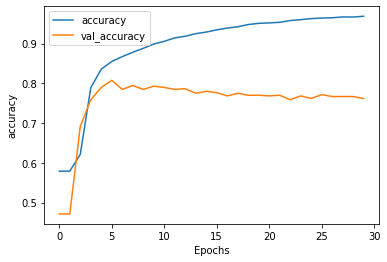

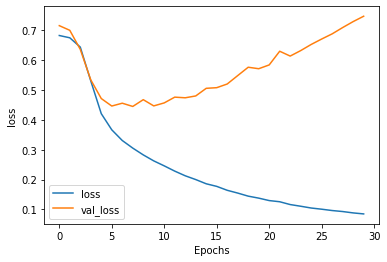

In [85]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [90]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

test_sequences = tokenizer.texts_to_sequences(test_df2['text'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type)

In [92]:
tokenizer.fit_on_texts(training_keyword)
word_index = tokenizer.word_index
test_key_seq = tokenizer.texts_to_sequences(test_df2['keyword'])
test_key_padded = pad_sequences(test_key_seq, maxlen=3, padding=padding_type)

In [91]:
test_padded.shape

(3263, 100)

In [93]:
test_key_padded.shape

(3263, 3)

In [94]:
test_data = np.concatenate((test_padded, test_key_padded), axis=1)

In [95]:
test_data.shape

(3263, 103)

In [97]:
preds = model.predict(test_data)

In [98]:
preds

array([[0.42153037],
       [0.73780924],
       [0.9998287 ],
       ...,
       [0.96859   ],
       [0.9003464 ],
       [0.9687691 ]], dtype=float32)

In [103]:
preds[preds < 0.5 ] = 0
preds[preds > 0.5 ] = 1

In [104]:
preds

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [105]:
preds = preds.astype('int32')

In [107]:
preds

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [100]:
submission_df = pd.read_csv("tweetsample_submission.csv")

In [101]:
submission_df

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [108]:
def generate_submission(preds, fname):
    sub_df = pd.read_csv('tweetsample_submission.csv')
    sub_df['target'] = preds
    sub_df.to_csv(fname, index=None)

In [109]:
generate_submission(preds, 'tweet_sub.csv')